In [36]:
# 可视化
# 显示图片及其预测标签
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

# 显示各标签在对应图片中的置信度
def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1]) 
  predicted_label = np.argmax(predictions_array)
  # 正确标签设置为蓝色，置信度最大标签设置为红色
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

In [1]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

1.11.0


In [2]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 157s 35us/step


In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [4]:
train_images.shape

(60000, 28, 28)

In [5]:
len(train_labels)

60000

In [6]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [7]:
test_images.shape

(10000, 28, 28)

In [8]:
len(test_labels)

10000

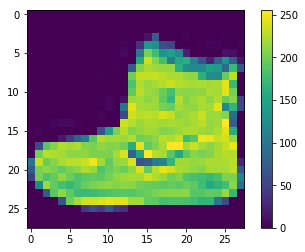

In [10]:
# 预处理数据
plt.figure()		# 定义一个图像窗口. 参数figsize()定义了以英寸为单位的窗口宽高，使用 plt.imshow 显示图像
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
# 将像素值缩小到 0 到 1 之间
train_images = train_images / 255.0
test_images = test_images / 255.0

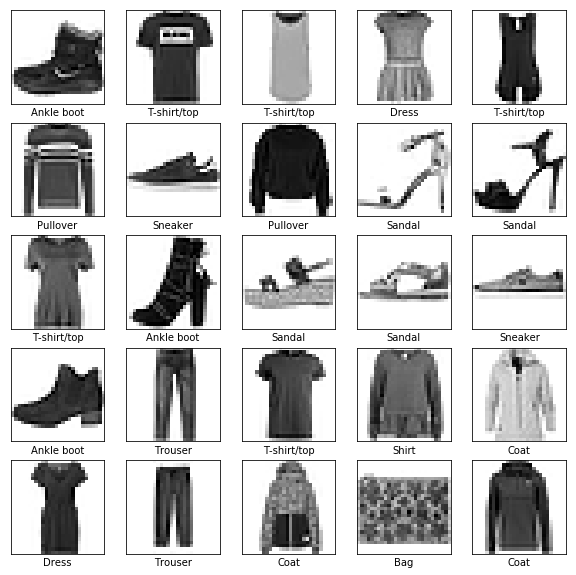

In [23]:
# 显示训练集中的前 25 张图像，并在每张图像下显示类别名称。验证确保数据格式正确无误，然后我们就可以开始构建和训练网络了
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)    # 绘制多个子图（5*5），子图从左至右，从上到下编号
    plt.xticks([])          # 不显示x轴的刻标以及对应的标签
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])        # 横向显示类名

In [25]:
#***************************构建模型***************************************
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])
#*************************************************************************

In [26]:
#***************************编译模型***************************************
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
#*************************************************************************

In [27]:
# 训练模型，使模型与训练数据‘拟合’
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 6s 100us/step - loss: 0.4937 - acc: 0.8261
Epoch 2/5
60000/60000 [==============================] - 5s 88us/step - loss: 0.3766 - acc: 0.8639
Epoch 3/5
60000/60000 [==============================] - 5s 88us/step - loss: 0.3362 - acc: 0.8766
Epoch 4/5
60000/60000 [==============================] - 5s 91us/step - loss: 0.3128 - acc: 0.8860
Epoch 5/5
60000/60000 [==============================] - 5s 88us/step - loss: 0.2935 - acc: 0.8913


In [29]:
# 在测试集上评估准确率
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)        #模型的评估返回结果为准确率和损失函数值test_loss，此处只输出准确率

10000/10000 [==============================] - 0s 32us/step
('Test accuracy:', 0.8766)


In [32]:
# 做出预测
predictions = model.predict(test_images)  # 所得结果为各标签的置信度
predictions[0]

array([9.6138883e-06, 5.8852225e-09, 1.7337922e-07, 4.9993174e-09,
       6.8633847e-07, 6.3806541e-02, 3.5113695e-05, 6.2225860e-02,
       3.8377519e-05, 8.7388372e-01], dtype=float32)

In [34]:
np.argmax(predictions[0])		# 选出最大置信度的标签


9

In [35]:
test_labels[0]				# 检验预测是否正确

9

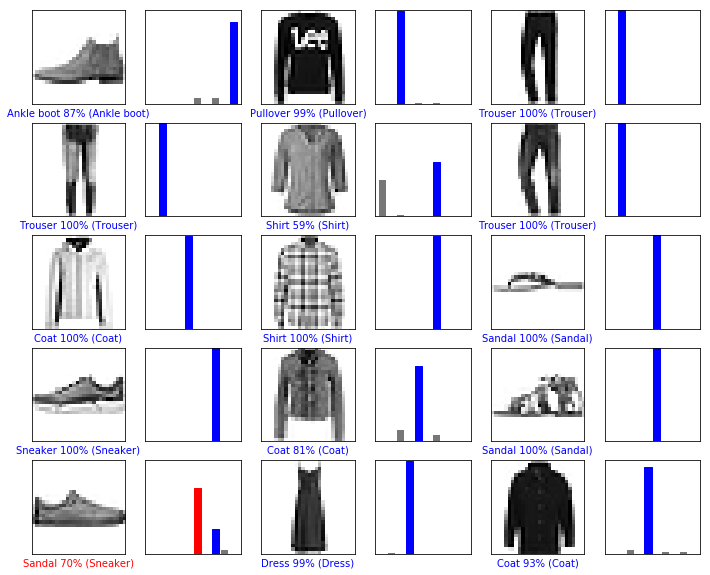

In [53]:
# 绘制前15张图的预测及各标签的置信度
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions, test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions, test_labels)

In [ ]:
plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions, test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions, test_labels)